# Merging Datasets

## Agri-Food System Water Use Dataset Overview

This dataset, sourced from the Harvard Dataverse, represents the "Agri-Food System Water Use" dataset. It is formatted as a tab-separated file and has been downloaded locally for analysis. The provided Python code utilizes Pandas to load the dataset into a DataFrame, adjusting the rows with an missing values. Additionally, it displays the first few rows of the dataset to provide an initial insight into its structure and content.

## Aquastat Dataset Overview

The following Python code reads an Excel file named 'AQUASTAT.xlsx', which contains data related to water withdrawal from various sectors. The DataFrame `df_aqua` is created to store this dataset. The Aquastat dataset encompasses information on water withdrawal from different sectors such as agriculture, industrial usage, freshwater withdrawal, and water stress indicators. These data points are crucial for understanding the utilization and management of water resources.



In [5]:
import pandas as pd

# Load the tab-separated file into a DataFrame
df = pd.read_csv('Agri-Food System Water Use Database.tab', sep='\t')
# Drop rows with all NaN values
df.dropna(axis=0, how='all', inplace=True)
# Read the Excel file
df_aqua = pd.read_excel('AQUASTAT.xlsx')
df


,Country code,Sector code,Area,Production,Green water intensity,Blue water intensity,Grey water intensity,Total green water,Total blue water,Total grey water
0,AFG,maiz,"72,433","106,670",924,"4,552",68,99,486,7
1,AFG,sorg,"2,307","11,640","2,698",0,49,31,0,1
2,AFG,rice,"117,539","352,177",359,"2,544",54,126,896,19
3,AFG,whea,"1,719,147","3,670,081","2,296",451,7,"8,426","1,656",27
4,AFG,puls,"61,166","61,778","1,098","3,261",295,68,201,18
...,...,...,...,...,...,...,...,...,...,...
5974,ZWE,gmll,0,"107,197",0,2,0,0,0,0
5975,ZWE,sref,0,"921,560",0,1,0,0,1,0
5976,ZWE,pcof,0,155,0,5,0,0,0,0
5977,ZWE,food,0,"213,168",0,2,0,0,0,0


### Country Code to Full Country Name Conversion

The following code utilizes the `pycountry` library to convert country codes to their corresponding full names. The function `get_country_name` takes a country code as input and returns the full country name if the code is valid; otherwise, it returns an error message. The DataFrame's 'Country code' column is then replaced with the corresponding full country names using the `apply` method and the `get_country_name` function.

Subsequently, the code removes the 'Country code' column from the DataFrame and reorders the columns for better organization. The reordered DataFrame is stored in `df1`. Additionally, it corrects 'United States' to 'United States of America' for consistenile.



In [6]:
df_aqua['Area'] = df_aqua['Area'].str.split('(', n=1).str[0].str.strip()
#Renaming the column Area into country 
df_aqua.rename(columns={'Area': 'Country'}, inplace=True)
df_aqua = df_aqua[df_aqua['Variable'] == "Agricultural water withdrawal as % of total renewable water resources"]
df_aqua['Country'] = df_aqua['Country'].replace('United States', 'United States of America')
#convert the value into "Agricultural water withdrawal as % of total renewable water resources
df_aqua.rename(columns={'Value': 'Agricultural water withdrawal as % of total renewable water resources'}, inplace=True)
#Removing the unwanted columns
df_aqua.drop(columns=['VariableGroup','Subgroup','Year','Unit','Symbol','IsAggregate','Variable'], inplace=True)

#df_aqua.to_excel(r"/Aqua_Modified.xlsx", index=False)
df_aqua

,Country,Agricultural water withdrawal as % of total renewable water resources
0,Afghanistan,30.613807
1,Albania,1.804636
2,Algeria,57.178366
3,Angola,0.098854
4,Antigua and Barbuda,3.461538
...,...,...
193,Western Asia,42.911169
194,World,6.755889
195,Yemen,154.047619
196,Zambia,1.099237


In [7]:
!pip install pycountry

In [8]:
import pycountry
def get_country_name(code):
    try:
        country = pycountry.countries.get(alpha_3=code)
        if country:
            return country.name
        else:
            return f"Unknown country code: {code}"
    except AttributeError:
        return f"Invalid country code format: {code}"

df['Country'] = df['Country code'].apply(lambda x: x.upper()).apply(get_country_name)
#Removing the Country code attribute from the dataframe 
df.drop(columns=['Country code'], inplace=True)
#Reordering the columns 
df = df[['Country', 'Sector code', 'Area', 'Production', 'Green water intensity', 'Blue water intensity', 'Grey water intensity', 'Total green water', 'Total blue water', 'Total grey water']]
df1 = df
df1['Country'] = df1['Country'].replace('United States', 'United States of America')

#Download the excel
#df1.to_excel(r"D:\Spring 2024\ITC 510 Software and Data Modelling\Project\Agri_Food_Country.xlsx", index=False)
df1

,Country,Sector code,Area,Production,Green water intensity,Blue water intensity,Grey water intensity,Total green water,Total blue water,Total grey water
0,Afghanistan,maiz,"72,433","106,670",924,"4,552",68,99,486,7
1,Afghanistan,sorg,"2,307","11,640","2,698",0,49,31,0,1
2,Afghanistan,rice,"117,539","352,177",359,"2,544",54,126,896,19
3,Afghanistan,whea,"1,719,147","3,670,081","2,296",451,7,"8,426","1,656",27
4,Afghanistan,puls,"61,166","61,778","1,098","3,261",295,68,201,18
...,...,...,...,...,...,...,...,...,...,...
5974,Zimbabwe,gmll,0,"107,197",0,2,0,0,0,0
5975,Zimbabwe,sref,0,"921,560",0,1,0,0,1,0
5976,Zimbabwe,pcof,0,155,0,5,0,0,0,0
5977,Zimbabwe,food,0,"213,168",0,2,0,0,0,0


Dynamic Data Extraction from Worldometer Website
The Following Python code extracts data from the World meter website regarding water usage statistics. The URL 'https://www.worldometers.info/water/' is utilized to access the webpage containing the relevant tables.

Extracting and Concatenating Tables
The tables present on the webpage are extracted using the pd.read_html() function, resulting in a list of DataFrames. These DataFrames are concatenated into a single DataFrame using the pd.concat() function.

Data Manipulation
The resulting DataFrame is further refined by replacing the country name "United States" with "United States of America" for consistency. Additionally, the column 'Daily Water Used Per Capita (liters)' is dropped from thee the data.

Displaying the Modified DataFrame
The modified DataFrame, containing data on 'Country', 'Yearly Water Used (m³, thousand of liters)', and 'Population', is displayed to provide an overview of the extracted information


In [9]:
import pandas as pd

url ='https://www.worldometers.info/water/'
# Extract tables
df_web = pd.read_html(url)
# Concatenate the list of DataFrames into a single DataFrame
df_web = pd.concat(df_web)
# Print the DataFrame
df_web = pd.DataFrame(df_web)
df_web['Country'] = df_web['Country'].replace('United States', 'United States of America')


# Drop the column 'Daily Water Used  Per Capita (liters)'
df_web.drop(columns=['Daily Water Used  Per Capita (liters)'], inplace=True)

# Display the modified DataFrame
df_web


,Country,"Yearly Water Used (m³, thouand of liters)",Population
0,Afghanistan,20280000000,19542982
1,Albania,1311000000,3003387
2,Algeria,9978000000,40339329
3,Angola,705800000,19450959
4,Antigua and Barbuda,11500000,87674
...,...,...,...
174,Venezuela,22630000000,27525097
175,Vietnam,82030000000,83142095
176,Yemen,3565000000,21320671
177,Zambia,1572000000,10508294


## Web Scraping and Data Cleaning with Selenium and BeautifulSoup
The following code utilizes Selenium and BeautifulSoup libraries to scrape data from the World Bank website, specifically the page which represents the percentage of land area used for agriculture.

### Web Scraping Process

1. **Launching a Browser**: The Chrome browser is launched using Selenium WebDriver.

2. **Accessing the Webpage**: Selenium navigates to the target URL 'https://data.worldbank.org/indicator/AG.LND.AGRI.ZS?end=2020&most_recent_year_desc=false&start=2019&view=chart'.

3. **Waiting for Page Load**: Implicit wait is implemented to ensure the page is fully loaded before proceeding.

4. **Getting Page Source**: The HTML content of the dynamically loaded page is extracted after it's fully loaded.

5. **Parsing HTML Content**: BeautifulSoup parses the HTML content to extract relevant information.

6. **Data Extraction**: The script extracts data such as country names, years, and percentage of land area used for agriculture from the parsed HTML content.

7. **DataFrame Creation**: Extracted data is structured into a DataFrame.

8. **Data Cleaning**:
   - The 'Year' column is dropped as it's not required for further analysis.
   - Column 'Value' is renamed to 'Percentage of land area' for clarity.
   - Non-NaN missing values represented as empty strings or 'NA' are converted to actual NaN values.
   - Rows with any missing values are dropped from the DataFrame.
   - The country name "United States" is standardized to "United States of America" for consistency.

In [10]:
!pip install selenium

In [11]:
from selenium import webdriver
from bs4 import BeautifulSoup

# Launch a browser
driver = webdriver.Chrome()

url = 'https://data.worldbank.org/indicator/AG.LND.AGRI.ZS?end=2020&most_recent_year_desc=false&start=2019&view=chart'
driver.get(url)

# Wait for some time to let the page load completely
driver.implicitly_wait(10)

# Get the page source after it's been dynamically loaded
html_content = driver.page_source

# Close the browser
driver.quit()

# Use BeautifulSoup to parse the dynamically loaded content
soup = BeautifulSoup(html_content, 'html.parser')

# Find all div elements with class "infinite"
infinite_divs = soup.find_all('div', class_='infinite')
#infinite_divs



In [12]:
# Initialize lists to store extracted values
countries = []
years = []
values = []

# Iterate through each div in infinite_divs
for div in infinite_divs:
    # Get all divs inside the current div with class "item"
    divs_inside_item = div.find_all('div', class_='item')
    
    # Iterate through each div inside the item div
    for item_div in divs_inside_item:
        # Find the country name
        country_element = item_div.find('a', class_='country-name')
        country = country_element.text.strip() if country_element else None
        
        # Find the year and value
        divs = item_div.find_all('div')
        year = divs[1].text.strip() if len(divs) > 1 else None
        value = divs[2].text.strip() if len(divs) > 2 else None
        
        # Append extracted values to the lists
        countries.append(country)
        years.append(year)
        values.append(value)

# Create a DataFrame from the extracted values
import pandas as pd
df = pd.DataFrame({
    'Country': countries,
    'Year': years,
    'Value': values
})
df.drop(columns=['Year'], inplace=True)

df.rename(columns={'Value': 'Percentage of land area'}, inplace=True)
# Display the DataFrame
# Convert non-NaN missing values to NaN
df.replace({'': None, 'NA': None}, inplace=True)

# Drop rows with any missing values
cleaned_df = df.dropna()
cleaned_df = cleaned_df.copy()
cleaned_df.loc[cleaned_df['Country'] == 'United States', 'Country'] = 'United States of America'

#cleaned_df.to_excel(r"D:\Spring 2024\ITC 510 Software and Data Modelling\Project\sample.xlsx", index=False)

cleaned_df

,Country,Percentage of land area
1,Bangladesh,76.3
2,Belgium,45.1
3,Burkina Faso,46.1
4,Bulgaria,46.5
5,"Venezuela, RB",24.4
...,...,...
237,High income,34.5
238,Middle income,36.9
239,Lower middle income,42.0
240,Low & middle income,37.7


## Country Name Conversion and Data Filtering

The provided code snippet manipulates the Aquastat dataset (`df_aqua`) to refine water withdrawal statistics. Firstly, it standardizes country names by extracting only the country name portion from the 'Area' column and renaming it to 'Country'. Additionally, it filters the dataset to retain only rows related to "Agricultural water withdrawal as % of total renewable water resources".

Subsequently, the code standardizes the country name "United States" to "United States of America" for consistency across datasets. It also enhances column readability by renaming the 'Value' column to "Agricultural water withdrawal as % of total renewable water resources". Finally, unnecessary columns such as 'VariableGroup', 'Subgroup', 'Year', 'Unit', 'Symbol', and 'IsAggregate' are truncated, perparing  a refined DataFrame ready for analysis.

### Merge df_web with df_aqua on the 'Country' column
### Merge df1 with the previously merged DataFrame on the 'Country' col

### Merge cleaned_df with the previously merged DataFrame on the 'Country' 



In [13]:
#Final stage of Merging the data for our EDA analysis.
merged_df = pd.merge(df_web,df_aqua, on='Country')
merged_df = pd.merge(df1,merged_df, on='Country')
merged_df = pd.merge(cleaned_df,merged_df, on='Country')
merged_df

,Country,Percentage of land area,Sector code,Area,Production,Green water intensity,Blue water intensity,Grey water intensity,Total green water,Total blue water,Total grey water,"Yearly Water Used (m³, thouand of liters)",Population,Agricultural water withdrawal as % of total renewable water resources
0,Bangladesh,76.3,maiz,"400,478","3,288,102","1,089",0,333,"3,581",0,"1,095",35870000000,145421318,2.567170
1,Bangladesh,76.3,sorg,"7,929","12,800","3,787",0,0,48,0,0,35870000000,145421318,2.567170
2,Bangladesh,76.3,rice,"11,515,000","54,416,000","1,348",188,273,"73,353","10,230","14,856",35870000000,145421318,2.567170
3,Bangladesh,76.3,whea,"351,514","1,099,617","1,023",338,81,"1,125",372,89,35870000000,145421318,2.567170
4,Bangladesh,76.3,puls,"354,563","419,182","4,200",1,188,"1,761",1,79,35870000000,145421318,2.567170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,Saudi Arabia,80.8,gmll,0,"126,792",0,2,0,0,0,0,23350000000,34193122,883.333333
4993,Saudi Arabia,80.8,sref,0,"920,170",0,1,0,0,1,0,23350000000,34193122,883.333333
4994,Saudi Arabia,80.8,pcof,0,"43,016",0,5,0,0,0,0,23350000000,34193122,883.333333
4995,Saudi Arabia,80.8,food,0,"239,519",0,2,0,0,0,0,23350000000,34193122,883.333333


## Data Conversion: Removing Commas and Converting to Numeric

The following code performs data conversion operations on the DataFrame `merged_df`. It creates a new DataFrame `df` and then proceeds with the conversion process.

### DataFrame Update

A copy of the original DataFrame `merged_df` is assigned to a new DataFrame `df` for data manipulation.

### Columns Conversion

The script identifies a list of columns (`columns_to_convert`) that require conversion. These columns include 'Area', 'Production', 'Green water intensity', 'Blue water intensity', 'Grey water intensity', 'Total green water', 'Total blue water', and 'Total grey water'.

### Data Cleaning

For each column in the `columns_to_convert` list, the script removes commas from the values using the `str.replace()` method. Afterward, it converts the cleaned values to numeric data type using the `astype(float)` method.

### Results Display

The updated DataFrame `df` is printed to the console, showcasing the converted numeric values in the specified columns.


In [14]:
df = merged_df

# List of columns to convert
columns_to_convert = ['Area', 'Production', 'Green water intensity', 
                      'Blue water intensity', 'Grey water intensity', 
                      'Total green water', 'Total blue water', 
                      'Total grey water']

# Remove commas and convert the columns to numeric
for col in columns_to_convert:
    df[col] = df[col].str.replace(',', '').astype(float)

# Print the updated DataFrame
df

,Country,Percentage of land area,Sector code,Area,Production,Green water intensity,Blue water intensity,Grey water intensity,Total green water,Total blue water,Total grey water,"Yearly Water Used (m³, thouand of liters)",Population,Agricultural water withdrawal as % of total renewable water resources
0,Bangladesh,76.3,maiz,400478.0,3288102.0,1089.0,0.0,333.0,3581.0,0.0,1095.0,35870000000,145421318,2.567170
1,Bangladesh,76.3,sorg,7929.0,12800.0,3787.0,0.0,0.0,48.0,0.0,0.0,35870000000,145421318,2.567170
2,Bangladesh,76.3,rice,11515000.0,54416000.0,1348.0,188.0,273.0,73353.0,10230.0,14856.0,35870000000,145421318,2.567170
3,Bangladesh,76.3,whea,351514.0,1099617.0,1023.0,338.0,81.0,1125.0,372.0,89.0,35870000000,145421318,2.567170
4,Bangladesh,76.3,puls,354563.0,419182.0,4200.0,1.0,188.0,1761.0,1.0,79.0,35870000000,145421318,2.567170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,Saudi Arabia,80.8,gmll,0.0,126792.0,0.0,2.0,0.0,0.0,0.0,0.0,23350000000,34193122,883.333333
4993,Saudi Arabia,80.8,sref,0.0,920170.0,0.0,1.0,0.0,0.0,1.0,0.0,23350000000,34193122,883.333333
4994,Saudi Arabia,80.8,pcof,0.0,43016.0,0.0,5.0,0.0,0.0,0.0,0.0,23350000000,34193122,883.333333
4995,Saudi Arabia,80.8,food,0.0,239519.0,0.0,2.0,0.0,0.0,0.0,0.0,23350000000,34193122,883.333333


## Hypothesis 1: Population Size Does Not Directly Determine Rice Production Levels

The hypothesis challenges the conventional belief that countries with larger populations inherently produce higher quantities of rice. Empirical evidence suggests that factors beyond population size play a significant role in determining rice production levels. 

### Observation

Contrary to expectations, some nations with sizable populations, such as the United States, exhibit lower rice production compared to countries with relatively smaller populations like Bangladesh, Indonesia, Nigeria, and Pakistan.

### Factors Influencing Rice Production

Several factors beyond population size likely influence rice cultivation and output. These factors may include:

- **Agricultural Practices**: Variation in farming techniques and technologies adopted by different countries.
- **Land Availability**: The extent of arable land suitable for rice cultivation.
- **Climate Conditions**: Influence of climate factors such as temperature, rainfall, and humidity on rice yield.
- **Technological Advancements**: Adoption of modern agricultural technologies and practices.
- **Government Policies**: Agricultural policies and initiatives aimed at promoting or restricting rice production.
- **Economic Factors**: Market demand, trade policies, and economic incentives impacting rice production.

### Conclusion
The hypothesis highlights the intricate interplay of factors shaping rice production, indicating that population size alone does not dictate production levels. It underscores the importance of considering diverse agricultural, environmental, and socio-economic variables in understanding and addressing global rice production dynamics effectively.

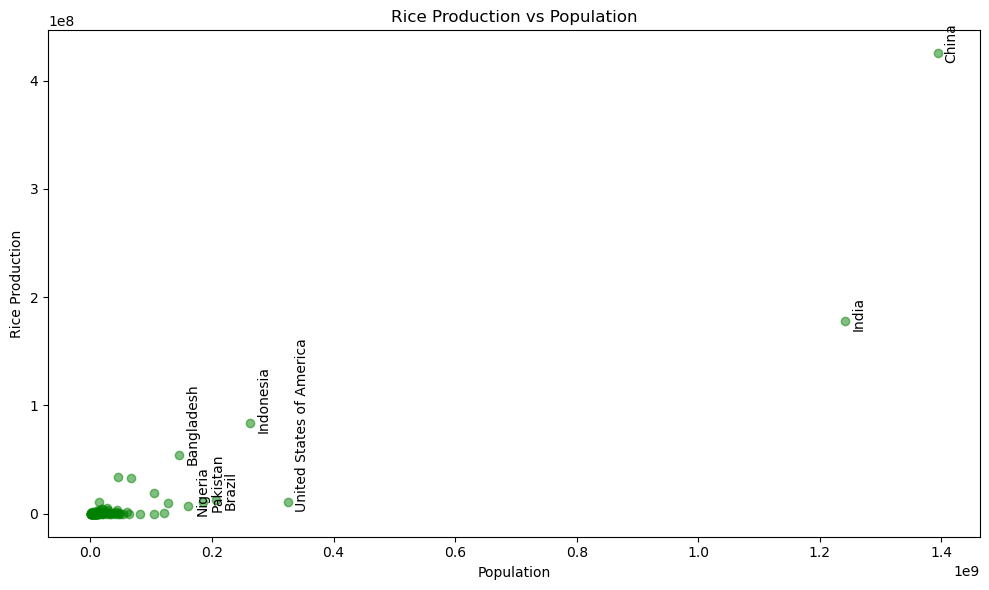

In [15]:
import matplotlib.pyplot as plt

# Filter data for rice sector code
rice_data = df[df['Sector code'] == 'rice']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(rice_data['Population'], rice_data['Production'], color='green', alpha=0.5)
plt.xlabel('Population')
plt.ylabel('Rice Production')
plt.title('Rice Production vs Population')


# Annotate points with country names
for i, txt in enumerate(rice_data['Country']):
    if rice_data['Population'].iloc[i] > 0.13e9:
        plt.annotate(txt, (rice_data['Population'].iloc[i], rice_data['Production'].iloc[i]), xytext=(5, -5), textcoords='offset points',rotation=90)

plt.tight_layout()
plt.show()


## Scatter Plot Analysis: Rice Production vs Population

It generates a scatter plot comparing rice production with population across different countries. 

### Code Explanation

1. **Filtering Data**: The code filters the DataFrame `df` to select data related to the rice sector using the condition `df['Sector code'] == 'rice'`.

2. **Plotting Scatter Plot**: Using Matplotlib, the code creates a scatter plot with rice production on the y-axis and population on the x-axis. Each point represents a country, with the color set to green and transparency set to 0.5.

3. **Annotating Data Points**: The code annotates data points where the population exceeds 0.13e9 (130 million). Country names are displayed next to the corresponding data points, with adjustments made for better readability.

4. **Plot Customization**: The plot is customized with appropriate axis labels ('Population' and 'Rice Production') and a title ('Rice Production vs Population').

5. **Displaying Plot**: Finally, the plot is displayed using `plt.show()`.

### Insights

The scatter plot allows for visual examination of the relationship between population size and rice production across different countries. Annotated data points provide additional context, highlighting countries with large populations and their corresponding rice production levels.


## Hypothesis 2: Increasing Production is Associated with an Increase in Total Grey Water Consumption

The hypothesis proposes that there exists a positive correlation between increasing production levels and the total consumption of grey water. While acknowledging the positive correlations between production and both total green and total blue water consumption, it suggests that the correlation with total grey water consumption is notably stronger. This implies that as production levels rise, particularly in agricultural settings, there is a corresponding increase in the utilization of grey water resources.

### Rationale

Observing the data, it's noted that there is a tendency for production to be positively associated with the consumption of green and blue water resources. However, the hypothesis focuses specifically on the relationship with grey water consumption, suggesting that this relationship may be more pronounced compared to the others.

### Implications

If the hypothesis is confirmed, it would indicate the significance of considering grey water management strategies alongside efforts to increase production. This would have implications for agricultural practices and water resource management policies, particularly in regions where water scarcity is a concern.

### Data Analysis

The correlation heatmap visualization serves as a tool to assess the strength and significance of these relationships within the dataset, potentially confirming or refuting the hypothesis. By examining the correlations between production and water consumption types, the analysis aims to provide insights into the dynamics of water resource utilization in relation to agricultural production.


<Figure size 640x480 with 0 Axes>

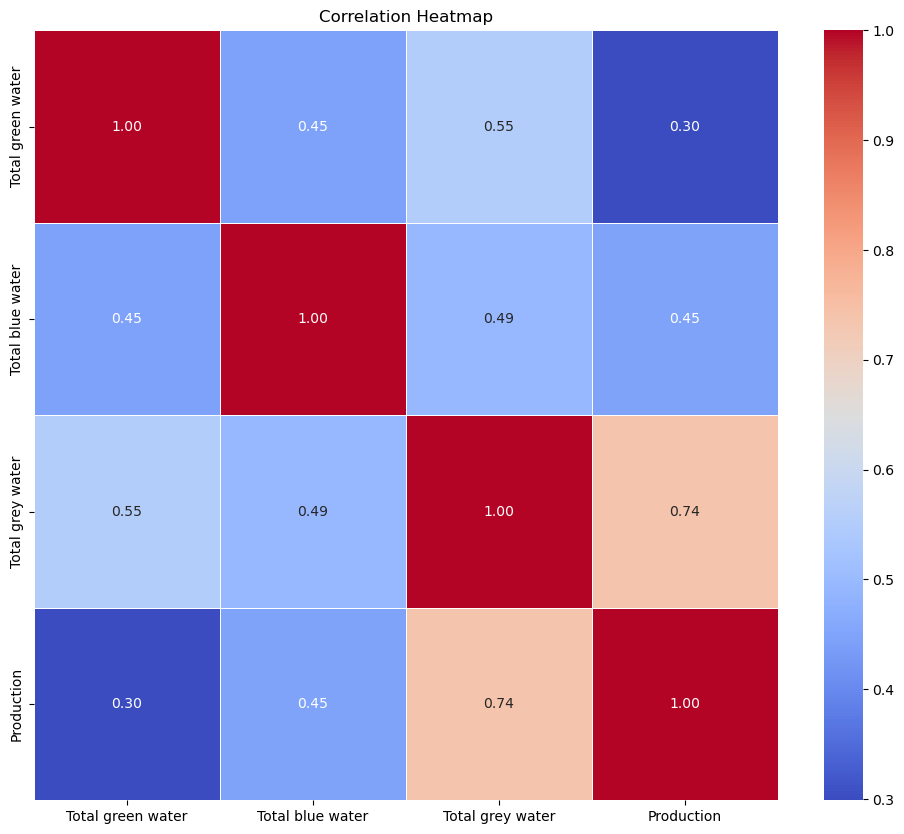

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the relevant columns
# If not, replace 'df' with your DataFrame name

# Selecting the relevant columns
selected_columns = ['Total green water', 'Total blue water', 'Total grey water', 'Production']
selected_df = df[selected_columns]

# Calculating correlation matrix
correlation_matrix = selected_df.corr()

# Resetting the plotting environment
plt.clf()

# Plotting heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Correlation Analysis Using Heatmap
It utilizes Seaborn and Matplotlib libraries to generate a heatmap visualizing the correlation matrix between selected variables in the DataFrame.

### Code Explanation

1. **Selecting Relevant Columns**: The code selects specific columns ('Total green water', 'Total blue water', 'Total grey water', 'Production') from the DataFrame `df`.

2. **Calculating Correlation Matrix**: A correlation matrix is computed for the selected columns using the `corr()` function.

3. **Plotting Heatmap**: Seaborn's `heatmap()` function is employed to create a heatmap visualization of the correlation matrix. Correlation values are annotated on the heatmap for clarity.

4. **Resetting Plotting Environment**: The plotting environment is reset to avoid interference with previous plots.

5. **Visualizing Results**: The heatmap provides insight into the correlation between different variables, aiding in understanding the relationships within the dataset.

## Hypothesis 3: Water Usage is Lower in Countries with High Population Compared to Countries with Lower Population

The hypothesis challenges the assumption that water usage increases proportionally with population growth. Instead, it posits that certain countries with high population sizes may exhibit lower water usage compared to countries with smaller populations.

### Rationale

Observing the data, it's noted that water usage patterns may vary significantly across countries irrespective of population size. This hypothesis suggests that factors beyond population, such as water management practices, infrastructure development, and socio-economic conditions, play a crucial role in determining water usage levels.

### Implications

If the hypothesis is confirmed, it would indicate the importance of considering contextual factors when assessing water usage trends. Policy interventions aimed at addressing water scarcity and promoting sustainable water management practices would need to account for the diverse needs and challenges faced by countries with varying population sizes.

### Data Analysis

The bar plot visualization serves as a tool to compare water usage across different population sizes, allowing for the examination of potential trends and disparities. By analyzing the relationship between population size and water usage, the analysis aims to provide insights into the complex dynamics of water resource utilization on a global scale.


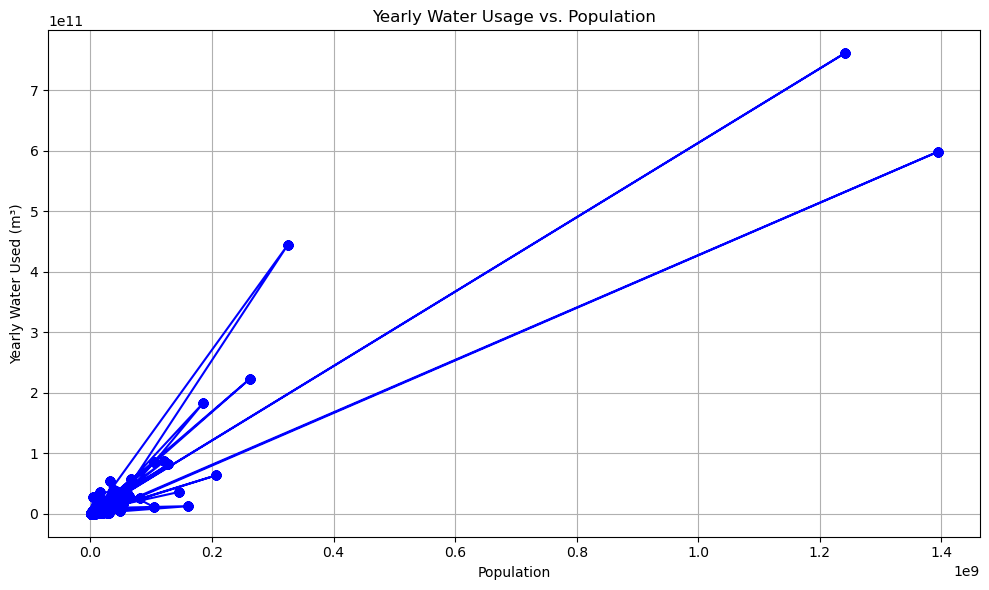

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns 'Yearly Water Used (m³)' and 'Population'
# Extract the columns you want to rename and assign them to a new DataFrame
df_subset = df[['Yearly Water Used  (m³, thouand of liters)', 'Population']]

# Rename the columns
df_subset.columns = ['Yearly_Water_Used_m3', 'Population']

# Plotting a line plot
plt.figure(figsize=(10, 6))
plt.plot(df_subset['Population'], df_subset['Yearly_Water_Used_m3'], marker='o', linestyle='-', color='blue')
plt.title('Yearly Water Usage vs. Population')
plt.xlabel('Population')
plt.ylabel('Yearly Water Used (m³)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Plotting Yearly Water Usage vs. Population

### Code Explanation

1. **Selecting Relevant Columns**: The code first extracts the columns 'Yearly Water Used (m³)' and 'Population' from the DataFrame `df` and assigns them to a new DataFrame called `df_subset`.

2. **Renaming Columns**: The extracted columns are then renamed for clarity. 'Yearly Water Used (m³)' is renamed to 'Yearly_Water_Used_m3', removing spaces and commas, and 'Population' remains unchanged.

3. **Plotting a Line Plot**: A line plot is created using Matplotlib's `plot()` function. The x-axis represents the 'Population' data from `df_subset`, and the y-axis represents the 'Yearly_Water_Used_m3' data. Data points are marked with circular markers ('o'), and a solid blue line connects them ('-').

4. **Setting Title and Labels**: Title, xlabel, and ylabel are set for the plot to provide context and clarity.

5. **Enabling Grid**: Grid lines are enabled on the plot using `grid(True)` for better readability.

6. **Adjusting Layout and Displaying**: `tight_layout()` adjusts subplot parameters to provide padding, and `show()` displays the plot.



### Install geopandas

In [18]:
!pip install geopandas

## Hypothesis 4: Asian, Middle Eastern, and North African Countries Exhibit a Substantial Proportion of Agricultural Water Withdrawal from Total Renewable Water Resources

The hypothesis suggests that countries in Asia, the Middle East, and North Africa demonstrate a significant proportion of agricultural water withdrawal relative to their total renewable water resources.

### Rationale

Historically, regions like Asia, the Middle East, and North Africa have faced challenges related to water scarcity and agricultural water management. This hypothesis is based on the observation that agricultural practices in these regions heavily rely on water resources, leading to a substantial proportion of water withdrawal for irrigation purposes.

### Implications

Confirming this hypothesis would underscore the urgent need for sustainable water management strategies in these regions to address the increasing demand for agricultural water while ensuring the preservation of renewable water resources. It highlights the importance of policy interventions and technological advancements aimed at improving water efficiency in agriculture to mitigate the risks of water scarcity and promote food security.

### Data Analysis

Analyzing the data through spatial visualizations and statistical analyses can provide insights into the extent of agricultural water withdrawal in Asian, Middle Eastern, and North African countries relative to their renewable water resources. By examining the relationship between agricultural practices and water availability, this analysis seeks to inform strategies for enhancing water sustainability in regions facing water-related challenges.



C:\Users\suman\AppData\Local\Temp\ipykernel_23544\4109463970.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


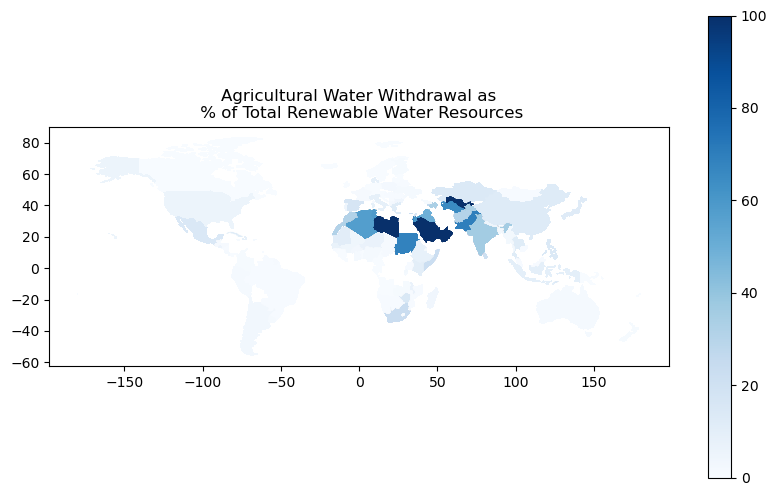

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile containing country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge data with shapefile
merged = world.merge(df, how='left', left_on='name', right_on='Country')

# Specify the desired range
vmin = 0  # Minimum value
vmax = 100  # Maximum value

# Create figure and axes
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.set_title('Agricultural Water Withdrawal as\n % of Total Renewable Water Resources')

# Plot choropleth map
merged.plot(column='Agricultural water withdrawal as % of total renewable water resources', cmap='Blues', legend=True, ax=ax, vmin=vmin, vmax=vmax)

plt.show()


## Code Explanation

The code utilizes the `geopandas` library to create a choropleth map displaying agricultural water withdrawal as a percentage of total renewable water resources for different countries.

1. **Importing Libraries:** The code begins by importing the necessary libraries, including `geopandas` and `matplotlib.pyplot`.

2. **Loading Shapefile:** The shapefile containing country boundaries is loaded using `geopandas.datasets.get_path()` function.

3. **Merging Data:** The data containing agricultural water withdrawal information is merged with the shapefile based on country names using the `merge()` function.

4. **Specifying Color Range:** The `vmin` and `vmax` variables are defined to specify the minimum and maximum values for the color scale in the choropleth map.

5. **Creating Figure and Axes:** A figure and axes are created using `plt.subplots()` function to prepare for visualization.

6. **Setting Title:** The title of the plot is set using `ax.set_title()` to describe the data being visualized.

7. **Plotting Choropleth Map:** The choropleth map is plotted using the `plot()` function on the merged GeoDataFrame. The column representing agricultural water withdrawal as a percentage of total renewable water resources is specified for coloring (`column='Agricultural water withdrawal as % of total renewable water resources'`). The colormap 'Blues' is chosen, and a legend is included for reference. The color scale is set according to the specified range (`vmin` and `vmax`).

8. **Displaying the Plot:** Finally, the plot is displayed using `plt.show()`.

This code provides a visual representation of agricultural water withdrawal as a percentage of total renewable water resources across different countries, facilitating the analysis of spatial patterns and disparities in water resource utilization.



## Hypothesis 5: Positive Relationship between Water Consumption and Production

The hypothesis proposes that there exists a positive relationship between water consumption and production levels. Specifically, it suggests that higher levels of water consumption are associated with increased production output.

### Rationale

The hypothesis is grounded in the assumption that water plays a crucial role in agricultural production processes. It posits that as water consumption increases, the availability of water resources for irrigation and other agricultural activities enhances, leading to higher levels of production.

### Implications

Confirming this hypothesis would underscore the importance of water management strategies in optimizing agricultural production. It implies that efficient utilization of water resources can contribute to improving agricultural productivity and ensuring food security. Additionally, it highlights the need for sustainable water management practices to mitigate potential environmental impacts associated with increased water consumption.

### Data Analysis

The line plot visualization compares production levels with total water usage across different countries. By examining the relationship between these variables, the analysis aims to elucidate any patterns or trends indicative of a positive correlation between water consumption and production.



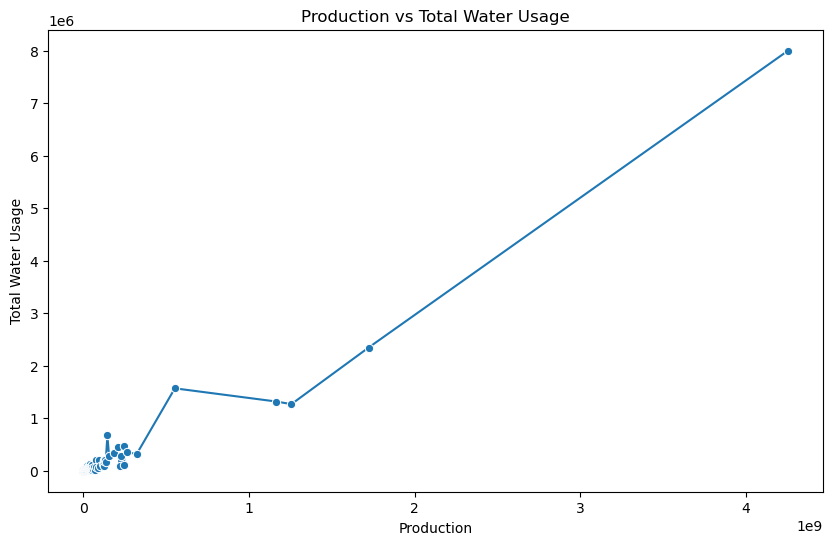

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the mentioned attributes

# Group by 'Country' and sum up the columns
summed_df = df.groupby('Country').agg({
    'Production': 'sum',
    'Total green water': 'sum',
    'Total blue water': 'sum',
    'Total grey water': 'sum'
}).reset_index()

# Summing up the total water usage
summed_df['Total Water'] = summed_df['Total green water'] + summed_df['Total blue water'] + summed_df['Total grey water']

# Using Seaborn for plotting
plt.figure(figsize=(10, 6))

# Line plot with Seaborn
sns.lineplot(x='Production', y='Total Water', data=summed_df, marker='o')

# Adding labels and title
plt.xlabel('Production')
plt.ylabel('Total Water Usage')
plt.title('Production vs Total Water Usage')

# Show plot

plt.show()


## Code Explanation

The code performs data aggregation and visualization to explore the relationship between production levels and total water usage across different countries.

1. **Importing Libraries:** The code begins by importing the necessary libraries, including `pandas`, `seaborn`, and `matplotlib.pyplot`.

2. **Data Aggregation:** The DataFrame `df` is assumed to contain attributes related to production and water usage, grouped by country. The code groups the DataFrame by 'Country' and calculates the sum of various columns representing production ('Production') and different types of water usage ('Total green water', 'Total blue water', 'Total grey water'). The aggregated data is stored in a new DataFrame called `summed_df`.

3. **Calculating Total Water Usage:** The total water usage is computed by summing up the values of 'Total green water', 'Total blue water', and 'Total grey water' columns for each country. This total water usage is added as a new column named 'Total Water' in the `summed_df` DataFrame.

4. **Plotting with Seaborn:** A line plot is created using Seaborn (`sns.lineplot()`) with 'Production' on the x-axis and 'Total Water' on the y-axis. The `marker='o'` argument adds markers to each data point for better visualization.

5. **Adding Labels and Title:** Labels for the x-axis ('Production') and y-axis ('Total Water Usage') are set using `plt.xlabel()` and `plt.ylabel()`, respectively. Additionally, a title ('Production vs Total Water Usage') is set using `plt.title()` to describe the content of the plot.

6. **Displaying the Plot:** Finally, the plot is displayed using `plt.show()`.

This code facilitates the exploration of the relationship between production and total water usage, providing insights into the potential correlation between these variables across different countries.



## Hypothesis 6 : Dominance of Green Water Usage Across Crop Sectors

The hypothesis suggests that green water usage predominates over grey and blue water usage across various crop sectors. Specifically, it posits that most crops exhibit higher levels of green water intensity compared to grey and blue water intensities.

### Rationale

The hypothesis is based on the observation that green water, which represents water from precipitation stored in soil and used by plants, may play a primary role in sustaining crop growth across different agricultural sectors. It proposes that the natural water resources available to crops through rainfall and soil moisture retention are sufficient to meet their water needs, thereby leading to a higher emphasis on green water usage relative to blue and grey water sources.

### Implications

Confirming this hypothesis would highlight the significance of rainfall and soil moisture management in supporting agricultural productivity across various crop sectors. It implies that strategies aimed at enhancing green water availability, such as soil conservation practices and rainwater harvesting, may have substantial implications for crop production and water resource management.

### Data Analysis

The violin plot visualization compares the distribution of green, blue, and grey water intensities across different crop sectors. By examining the relative magnitudes of water intensities, the analysis aims to discern any patterns indicative of the dominance of green water usage in crop cultivation.



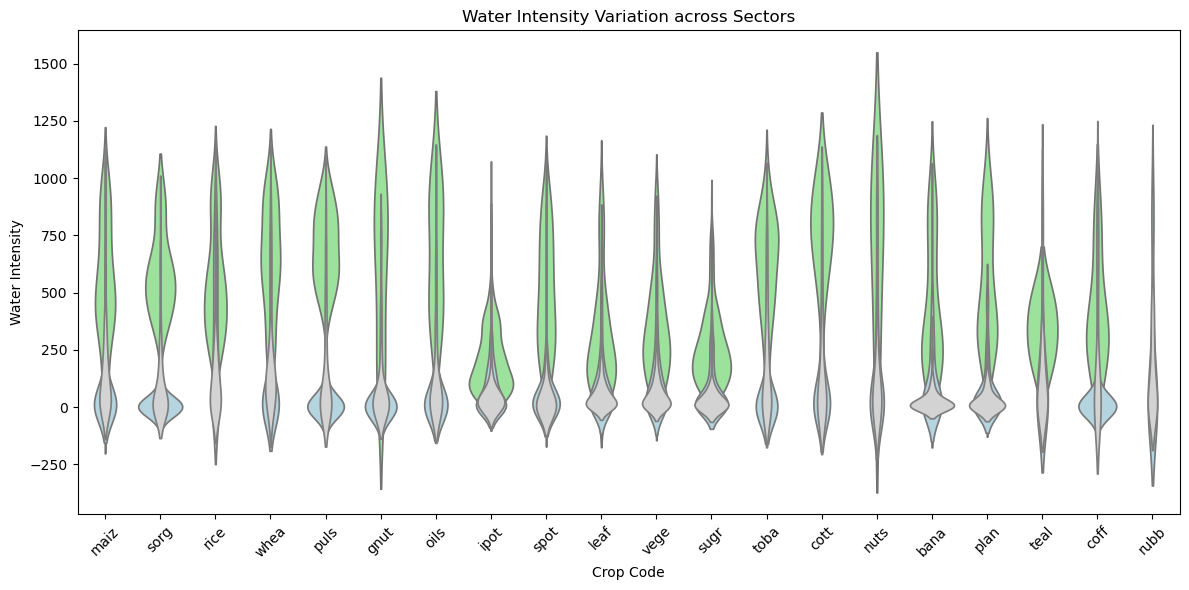

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your data into a pandas DataFrame
data = pd.read_excel('finalMergedDataSet.xlsx')

# Convert water intensity columns to numeric
data['Green water intensity'] = pd.to_numeric(data['Green water intensity'], errors='coerce')
data['Blue water intensity'] = pd.to_numeric(data['Blue water intensity'], errors='coerce')
data['Grey water intensity'] = pd.to_numeric(data['Grey water intensity'], errors='coerce')

# List of specific sector codes you want to filter
specific_sector_codes = ['maiz', 'sorg', 'rice', 'whea', 'puls', 'gnut', 'oils', 'ipot', 'spot', 
                         'leaf', 'vege', 'sugr', 'toba', 'cott', 'nuts', 'bana', 'plan', 'teal', 
                         'coff', 'rubb', 'orcp']

# Filter the DataFrame to include only the rows where the 'Sector code' is in the specific_sector_codes list
data = data[data['Sector code'].isin(specific_sector_codes)]

# Now, 'filtered_data' contains only the rows where the 'Sector code' matches one of the specific codes you listed


# Combine Violin Plots for all water intensities
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Sector code', y='Green water intensity', inner=None, color='lightgreen')
sns.violinplot(data=data, x='Sector code', y='Blue water intensity', inner=None, color='lightblue')
sns.violinplot(data=data, x='Sector code', y='Grey water intensity', inner=None, color='lightgrey')

# Adjust labels and title
plt.title('Water Intensity Variation across Sectors')
plt.xlabel('Crop Code')
plt.ylabel('Water Intensity')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


## Code Explanation

The code performs data loading, filtering, and visualization to explore the variation in water intensity across different crop sectors using violin plots.

1. **Importing Libraries:** The code begins by importing the necessary libraries, including `matplotlib.pyplot`, `seaborn`, and `pandas`.

2. **Loading Data:** The data is loaded from an Excel file ('finalMergedDataSet.xlsx') into a pandas DataFrame named `data`.

3. **Data Preprocessing:** The 'Green water intensity', 'Blue water intensity', and 'Grey water intensity' columns are converted to numeric data type using `pd.to_numeric()` function.

4. **Filtering Data:** The DataFrame is filtered to include only the rows where the 'Sector code' matches any of the specific sector codes listed in the `specific_sector_codes` list.

5. **Combining Violin Plots:** Violin plots are created using Seaborn (`sns.violinplot()`) to visualize the distribution of water intensities ('Green water intensity', 'Blue water intensity', 'Grey water intensity') across different crop sectors ('Sector code'). Three separate violin plots are generated for each water intensity category.

6. **Adjusting Labels and Title:** The title of the plot is set to 'Water Intensity Variation across Sectors', and labels for the x-axis ('Crop Code') and y-axis ('Water Intensity') are defined. Additionally, the x-axis labels are rotated by 45 degrees for better readability using `plt.xticks(rotation=45)`.

7. **Displaying the Plot:** The plot is displayed using `plt.show()`.

This code facilitates the visualization of water intensity variations across different crop sectors, aiding in the analysis of the predominant type of water usage (green, blue, or grey) in crop cultivation.

